# Differential Expression in Heart Disease and Healthy Tissue of Superior Cervical Ganglia

## Preprocess/Normalization

In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [2]:
counts = pd.read_csv('count_heart_hSCG.csv')

In [3]:
counts

,Geneid,hSCG_dis_S6,hSCG_dis_S5,hSCG_dis_S4,Healthy_S3,Healthy_S2,Healthy_S1
0,ENSG00000279928,0,14,10,2,0,8
1,ENSG00000228037,41,27,47,9,17,26
2,ENSG00000142611,2174,957,2633,1427,1175,2617
3,ENSG00000284616,0,0,0,0,0,0
4,ENSG00000157911,483,436,578,329,308,376
...,...,...,...,...,...,...,...
62749,ENSG00000271254,252,44,82,278,74,433
62750,ENSG00000275987,2,2,2,1,0,0
62751,ENSG00000268674,0,0,0,0,0,0
62752,ENSG00000277475,6,2,0,5,5,4


In [4]:
counts = counts.set_index('Geneid')
counts

,hSCG_dis_S6,hSCG_dis_S5,hSCG_dis_S4,Healthy_S3,Healthy_S2,Healthy_S1
Geneid,,,,,,
ENSG00000279928,0,14,10,2,0,8
ENSG00000228037,41,27,47,9,17,26
ENSG00000142611,2174,957,2633,1427,1175,2617
ENSG00000284616,0,0,0,0,0,0
ENSG00000157911,483,436,578,329,308,376
...,...,...,...,...,...,...
ENSG00000271254,252,44,82,278,74,433
ENSG00000275987,2,2,2,1,0,0
ENSG00000268674,0,0,0,0,0,0


In [5]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,hSCG_dis_S6,hSCG_dis_S5,hSCG_dis_S4,Healthy_S3,Healthy_S2,Healthy_S1
Geneid,,,,,,
ENSG00000279928,0,14,10,2,0,8
ENSG00000228037,41,27,47,9,17,26
ENSG00000142611,2174,957,2633,1427,1175,2617
ENSG00000157911,483,436,578,329,308,376
ENSG00000269896,57,24,63,32,17,77
...,...,...,...,...,...,...
ENSG00000277856,0,5,0,0,1,11
ENSG00000271254,252,44,82,278,74,433
ENSG00000275987,2,2,2,1,0,0


In [6]:
counts = counts.T

In [7]:
counts

Geneid,ENSG00000279928,ENSG00000228037,ENSG00000142611,ENSG00000157911,ENSG00000269896,ENSG00000228463,ENSG00000260972,ENSG00000142655,ENSG00000235054,ENSG00000149527,...,ENSG00000277196,ENSG00000278817,ENSG00000278384,ENSG00000276345,ENSG00000275063,ENSG00000277856,ENSG00000271254,ENSG00000275987,ENSG00000277475,ENSG00000275405
hSCG_dis_S6,0,41,2174,483,57,8,5,697,1,104,...,422,65,5,123,1,0,252,2,6,0
hSCG_dis_S5,14,27,957,436,24,12,0,978,0,157,...,245,78,11,177,23,5,44,2,2,0
hSCG_dis_S4,10,47,2633,578,63,3,0,1070,3,62,...,311,96,3,0,0,0,82,2,0,0
Healthy_S3,2,9,1427,329,32,7,16,586,0,133,...,205,43,50,58,0,0,278,1,5,0
Healthy_S2,0,17,1175,308,17,45,6,668,0,86,...,260,43,20,56,5,1,74,0,5,0
Healthy_S1,8,26,2617,376,77,14,3,647,0,121,...,73,37,40,0,9,11,433,0,4,5


In [8]:
metadata = pd.DataFrame(zip(counts.index, ['hSCG', 'hSCG', 'hSCG', 'H', 'H', 'H']), columns = ['Sample', 'Condition'])

In [9]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
hSCG_dis_S6,hSCG
hSCG_dis_S5,hSCG
hSCG_dis_S4,hSCG
Healthy_S3,H
Healthy_S2,H
Healthy_S1,H


In [10]:
dds = DeseqDataSet(counts =counts,
            metadata=metadata,
            design_factors = "Condition")
            

In [11]:
dds

AnnData object with n_obs × n_vars = 6 × 43008
    obs: 'Condition'
    obsm: 'design_matrix'

In [12]:
dds.var

""
Geneid
ENSG00000279928
ENSG00000228037
ENSG00000142611
ENSG00000157911
ENSG00000269896
...
ENSG00000277856
ENSG00000271254
ENSG00000275987


## DE

In [13]:
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.45 seconds.

Fitting dispersion trend curve...
... done in 9.05 seconds.

Fitting MAP dispersions...
... done in 26.60 seconds.

Fitting LFCs...
... done in 16.80 seconds.

Refitting 0 outliers.



In [14]:
dds

AnnData object with n_obs × n_vars = 6 × 43008
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [15]:
stat_res = DeseqStats(dds, n_cpus = 6, contrast = ('Condition', 'hSCG', 'H'))

In [16]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition hSCG vs H


... done in 5.09 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000279928,5.239121,1.181906,1.548284,0.763365,0.445246,NaN
ENSG00000228037,26.915815,1.010239,0.618790,1.632606,0.102552,0.416372
ENSG00000142611,1780.078860,0.039929,0.437973,0.091167,0.927360,0.977297
ENSG00000157911,407.203385,0.426809,0.305163,1.398625,0.161925,0.508179
ENSG00000269896,43.309590,0.117512,0.626668,0.187518,0.851254,0.951957
...,...,...,...,...,...,...
ENSG00000277856,2.700713,-1.347774,2.154686,-0.625508,0.531637,NaN
ENSG00000271254,188.768964,-1.083093,0.658568,-1.644618,0.100049,0.411552
ENSG00000275987,1.098876,2.342847,2.575114,0.909803,0.362926,NaN


In [17]:
res = stat_res.results_df

In [18]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000279928,5.239121,1.181906,1.548284,0.763365,0.445246,NaN
ENSG00000228037,26.915815,1.010239,0.618790,1.632606,0.102552,0.416372
ENSG00000142611,1780.078860,0.039929,0.437973,0.091167,0.927360,0.977297
ENSG00000157911,407.203385,0.426809,0.305163,1.398625,0.161925,0.508179
ENSG00000269896,43.309590,0.117512,0.626668,0.187518,0.851254,0.951957
...,...,...,...,...,...,...
ENSG00000277856,2.700713,-1.347774,2.154686,-0.625508,0.531637,NaN
ENSG00000271254,188.768964,-1.083093,0.658568,-1.644618,0.100049,0.411552
ENSG00000275987,1.098876,2.342847,2.575114,0.909803,0.362926,NaN


In [19]:
from sanbomics.tools import id_map

In [20]:
mapper = id_map(species = 'human')

In [21]:
res['Symbol'] = res.index.map(mapper.mapper)

In [22]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000279928,5.239121,1.181906,1.548284,0.763365,0.445246,NaN,DDX11L17
ENSG00000228037,26.915815,1.010239,0.618790,1.632606,0.102552,0.416372,AL139246.3
ENSG00000142611,1780.078860,0.039929,0.437973,0.091167,0.927360,0.977297,PRDM16
ENSG00000157911,407.203385,0.426809,0.305163,1.398625,0.161925,0.508179,PEX10
ENSG00000269896,43.309590,0.117512,0.626668,0.187518,0.851254,0.951957,NaN
...,...,...,...,...,...,...,...
ENSG00000277856,2.700713,-1.347774,2.154686,-0.625508,0.531637,NaN,AC233755.2
ENSG00000271254,188.768964,-1.083093,0.658568,-1.644618,0.100049,0.411552,AC240274.1
ENSG00000275987,1.098876,2.342847,2.575114,0.909803,0.362926,NaN,NaN


In [23]:
res = res[res.baseMean >= 10]

In [24]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,26.915815,1.010239,0.618790,1.632606,0.102552,0.416372,AL139246.3
ENSG00000142611,1780.078860,0.039929,0.437973,0.091167,0.927360,0.977297,PRDM16
ENSG00000157911,407.203385,0.426809,0.305163,1.398625,0.161925,0.508179,PEX10
ENSG00000269896,43.309590,0.117512,0.626668,0.187518,0.851254,0.951957,NaN
ENSG00000228463,15.851388,-1.758824,0.923859,-1.903779,0.056939,0.319143,NaN
...,...,...,...,...,...,...,...
ENSG00000277196,250.076914,0.679563,0.512292,1.326514,0.184670,0.537802,AC007325.2
ENSG00000278817,58.453426,0.804022,0.435455,1.846394,0.064835,0.340001,AC007325.4
ENSG00000278384,21.338736,-2.639339,0.725050,-3.640217,0.000272,0.029902,AL354822.1


In [25]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [26]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228929,54.452901,1.928265,0.516506,3.733285,0.000189,0.025680,RPS13P2
ENSG00000143631,31.094747,-2.988991,0.684699,-4.365411,0.000013,0.005292,FLG
ENSG00000225920,21.115490,-2.214805,0.654218,-3.385424,0.000711,0.046710,RIMKLBP2
ENSG00000284735,42.570128,-2.223007,0.636691,-3.491500,0.000480,0.040565,AL139424.3
ENSG00000259865,226.584366,1.497819,0.403741,3.709848,0.000207,0.026095,AL390728.6
...,...,...,...,...,...,...,...
ENSG00000223431,17.614259,-2.496921,0.738388,-3.381584,0.000721,0.046966,MTND6P21
ENSG00000227999,58.690483,-1.722138,0.461383,-3.732557,0.000190,0.025680,MTND5P1
ENSG00000215559,21.158449,-3.270399,0.933939,-3.501725,0.000462,0.039984,ANKRD20A11P


In [27]:
De_sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 3)]

In [28]:
De_sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000289483,13.747156,-3.315005,0.968884,-3.421468,6.228400e-04,4.449978e-02,NaN
ENSG00000230953,39.323907,-3.352644,0.709314,-4.726599,2.283109e-06,1.517626e-03,NaN
ENSG00000068781,65.232786,3.143436,0.746583,4.210433,2.548819e-05,7.928974e-03,STON1-GTF2A1L
ENSG00000228363,29.276865,-3.999743,0.802482,-4.984216,6.221366e-07,7.784392e-04,CHMP3-AS1
ENSG00000244124,47.262396,-3.511095,0.719523,-4.879751,1.062197e-06,9.414160e-04,ATP1B3-AS1
ENSG00000163394,56.978696,-3.448210,0.677905,-5.086570,3.645973e-07,4.847094e-04,CCKAR
ENSG00000169245,414.920862,3.508402,0.688311,5.097117,3.448651e-07,4.847094e-04,CXCL10
ENSG00000233110,37.125232,-3.129960,0.680134,-4.601978,4.184975e-06,2.405908e-03,SORBS2-AS1
ENSG00000251664,14.833887,-3.224738,0.912539,-3.533807,4.096197e-04,3.736526e-02,PCDHA12


## Visualization

In [29]:
import scanpy as sc

In [30]:
dds

AnnData object with n_obs × n_vars = 6 × 43008
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [31]:
sc.tl.pca(dds)

/home/josh/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


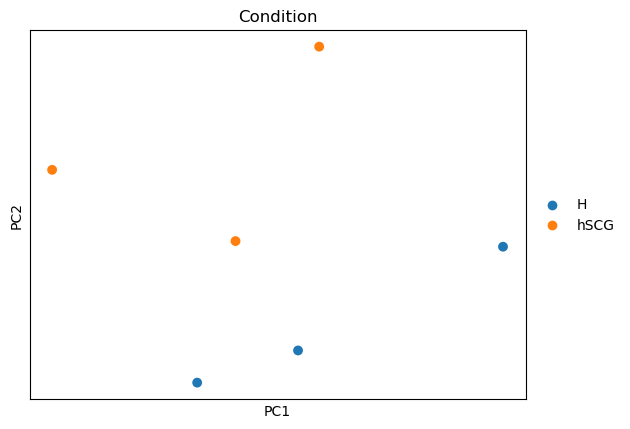

In [32]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [33]:
import gseapy as gp
from gseapy.plot import gseaplot

In [34]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,26.915815,1.010239,0.618790,1.632606,0.102552,0.416372,AL139246.3
ENSG00000142611,1780.078860,0.039929,0.437973,0.091167,0.927360,0.977297,PRDM16
ENSG00000157911,407.203385,0.426809,0.305163,1.398625,0.161925,0.508179,PEX10
ENSG00000269896,43.309590,0.117512,0.626668,0.187518,0.851254,0.951957,NaN
ENSG00000228463,15.851388,-1.758824,0.923859,-1.903779,0.056939,0.319143,NaN
...,...,...,...,...,...,...,...
ENSG00000277196,250.076914,0.679563,0.512292,1.326514,0.184670,0.537802,AC007325.2
ENSG00000278817,58.453426,0.804022,0.435455,1.846394,0.064835,0.340001,AC007325.4
ENSG00000278384,21.338736,-2.639339,0.725050,-3.640217,0.000272,0.029902,AL354822.1


In [35]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Geneid,,
ENSG00000019169,MARCO,5.891623
ENSG00000172724,CCL19,5.560896
ENSG00000148803,FUOM,5.123606
ENSG00000169245,CXCL10,5.097117
ENSG00000226752,CUTALP,4.942986
...,...,...
ENSG00000262663,AC087222.1,-5.560599
ENSG00000186479,RGS7BP,-5.718210
ENSG00000164532,TBX20,-6.294353


In [36]:
ranking = ranking.drop_duplicates('Symbol')

In [37]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [38]:
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2023'],
                     seed = 6, permutation_num = 100)

In [39]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2023__Glutamate Receptor...,0.000000,-0.642133,-2.363275
1,GO_Biological_Process_2023__Defense Response T...,0.000000,0.484835,2.262927
2,GO_Biological_Process_2023__Peptide Biosynthet...,0.000000,0.747329,3.656887
3,GO_Biological_Process_2023__Defense Response T...,0.000000,0.595444,2.364054
4,GO_Biological_Process_2023__Modulation Of Chem...,0.000000,-0.529094,-2.446486
...,...,...,...,...
2467,GO_Biological_Process_2023__Embryonic Skeletal...,0.999249,-0.128139,-0.430917
2468,GO_Biological_Process_2023__Positive Regulatio...,0.999405,-0.171788,-0.582738
2469,GO_Biological_Process_2023__DNA Replication In...,1.000000,-0.193002,-0.585201
2470,GO_Biological_Process_2023__Regulation Of Brow...,1.000000,0.124100,0.326165


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import random

In [41]:
dds.layers['normed_counts']

array([[0.00000000e+00, 4.04684074e+01, 2.14581263e+03, ...,
        1.97406866e+00, 5.92220597e+00, 0.00000000e+00],
       [1.28068683e+01, 2.46989603e+01, 8.75440927e+02, ...,
        1.82955262e+00, 1.82955262e+00, 0.00000000e+00],
       [9.08892801e+00, 4.27179616e+01, 2.39311474e+03, ...,
        1.81778560e+00, 0.00000000e+00, 0.00000000e+00],
       [1.94370381e+00, 8.74666715e+00, 1.38683267e+03, ...,
        9.71851906e-01, 4.85925953e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01784170e+01, 1.39468470e+03, ...,
        0.00000000e+00, 5.93482853e+00, 0.00000000e+00],
       [7.59522348e+00, 2.46844763e+01, 2.48458748e+03, ...,
        0.00000000e+00, 3.79761174e+00, 4.74701468e+00]])

In [42]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [43]:
dds.layers['log1p']

array([[0.        , 3.72493187, 7.67173952, ..., 1.08993093, 1.9347345 ,
        0.        ],
       [2.62516617, 3.24645054, 6.77586931, ..., 1.04011861, 1.04011861,
        0.        ],
       [2.31143859, 3.77775904, 7.78076881, ..., 1.03595133, 0.        ,
        0.        ],
       [1.07966859, 2.2769254 , 7.23549858, ..., 0.67897315, 1.76802324,
        0.        ],
       [0.        , 3.0529826 , 7.2411404 , ..., 0.        , 1.93655633,
        0.        ],
       [2.15120664, 3.24588678, 7.81826432, ..., 0.        , 1.56811824,
        1.74868053]])

In [44]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228929,54.452901,1.928265,0.516506,3.733285,0.000189,0.025680,RPS13P2
ENSG00000143631,31.094747,-2.988991,0.684699,-4.365411,0.000013,0.005292,FLG
ENSG00000225920,21.115490,-2.214805,0.654218,-3.385424,0.000711,0.046710,RIMKLBP2
ENSG00000284735,42.570128,-2.223007,0.636691,-3.491500,0.000480,0.040565,AL139424.3
ENSG00000259865,226.584366,1.497819,0.403741,3.709848,0.000207,0.026095,AL390728.6
...,...,...,...,...,...,...,...
ENSG00000223431,17.614259,-2.496921,0.738388,-3.381584,0.000721,0.046966,MTND6P21
ENSG00000227999,58.690483,-1.722138,0.461383,-3.732557,0.000190,0.025680,MTND5P1
ENSG00000215559,21.158449,-3.270399,0.933939,-3.501725,0.000462,0.039984,ANKRD20A11P


In [45]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 359
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [46]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

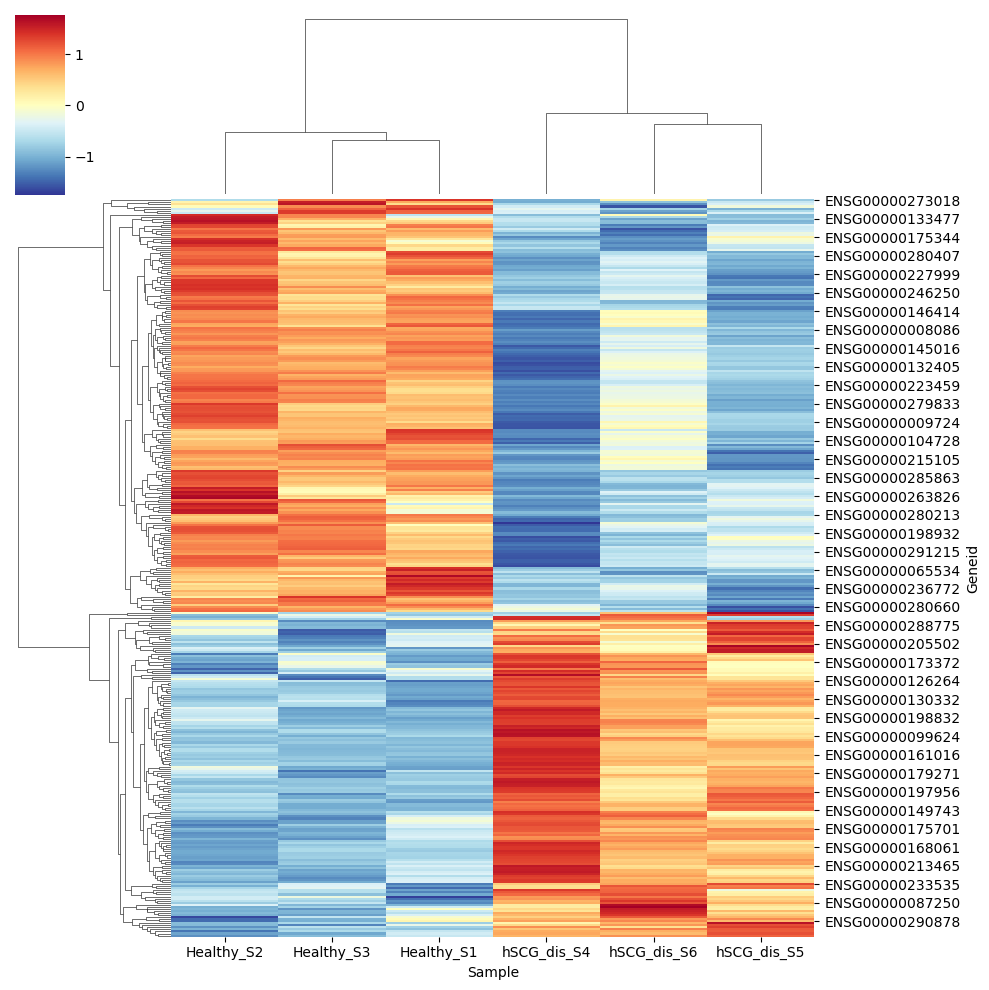

In [47]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [48]:
# Gene Symbols
Hdisease_gene_symbols = [
    "NOS1",       # Nitric Oxide Synthase 1, Neuronal
    "ADRB1",      # Beta-1 Adrenergic Receptor
    "ADRB2",      # Beta-2 Adrenergic Receptor
    "SLC6A2",     # Norepinephrine Transporter
    "TH",         # Tyrosine Hydroxylase
    "GAL",        # Galanin
    "CHRNA7",     # Nicotinic Acetylcholine Receptor Alpha-7
    "CHRNA3",     # Nicotinic Acetylcholine Receptor Alpha-3
    "CHRNA5",     # Nicotinic Acetylcholine Receptor Alpha-5
    "SLC18A2",    # Vesicular Monoamine Transporter 2
    "ACHE",       # Acetylcholinesterase
    "GABBR2",     # Gamma-Aminobutyric Acid B Receptor 2
    "ACHE",       # Acetylcholinesterase
    "SLC6A4",     # Serotonin Transporter
    "DBH",        # Dopamine Beta-Hydroxylase
    "PNMT",       # Phenylethanolamine N-Methyltransferase
    "BDNF",       # Brain-Derived Neurotrophic Factor
    "IL6",        # Interleukin-6
    "TNF",        # Tumor Necrosis Factor
    "ACE",        # Angiotensin-Converting Enzyme
    "AGT",        # Angiotensinogen
    "EDN1",       # Endothelin 1
    "REN",        # Renin
    "GNB3",       # Guanine Nucleotide-Binding Protein Subunit Beta-3
    "AGTR1",      # Angiotensin II Receptor Type 1
    "AGTR2",      # Angiotensin II Receptor Type 2
    "CRH",        # Corticotropin-Releasing Hormone
    "AVP",        # Arginine Vasopressin
    "VIP",        # Vasoactive Intestinal Peptide
    "EDNRA",      # Endothelin Receptor Type A
    "EDNRB",      # Endothelin Receptor Type B
    "ADRA1A",     # Alpha-1A Adrenergic Receptor
    "ADRA1B",     # Alpha-1B Adrenergic Receptor
    "ADRA1D",     # Alpha-1D Adrenergic Receptor
    "ADRA2A",     # Alpha-2A Adrenergic Receptor
    "ADRA2B",     # Alpha-2B Adrenergic Receptor
    "ADRA2C",     # Alpha-2C Adrenergic Receptor
    "AGRN",       # Agrin
    "NR3C1",      # Glucocorticoid Receptor (GR)
    "NR3C2",      # Mineralocorticoid Receptor (MR)
    "HTR1A",      # Serotonin Receptor 1A
    # Additional Genes to Reach 100
    "CALCA",      # Calcitonin Gene-Related Peptide Alpha
    "CALCB",      # Calcitonin Gene-Related Peptide Beta
    "CCK",        # Cholecystokinin
    "DAG1",       # Dystroglycan 1
    "DYNLT1",     # Dynein Light Chain Tctex-Type 1
    "HRH1",       # Histamine H1 Receptor
    "HRH2",       # Histamine H2 Receptor
    "HTR2A",      # Serotonin Receptor 2A
    "HTR2B",      # Serotonin Receptor 2B
    "HTR2C",      # Serotonin Receptor 2C
    "KCNA1",      # Potassium Voltage-Gated Channel Subfamily A Member 1
    "KCNA2",      # Potassium Voltage-Gated Channel Subfamily A Member 2
    "KCNA3",      # Potassium Voltage-Gated Channel Subfamily A Member 3
    "KCNA4",      # Potassium Voltage-Gated Channel Subfamily A Member 4
    "KCNA5",      # Potassium Voltage-Gated Channel Subfamily A Member 5
    "KCNA6",      # Potassium Voltage-Gated Channel Subfamily A Member 6
    "KCNA7",      # Potassium Voltage-Gated Channel Subfamily A Member 7
    "KCNA10",     # Potassium Voltage-Gated Channel Subfamily A Member 10
    "KCND2",      # Potassium Voltage-Gated Channel Subfamily D Member 2
    "KCND3",      # Potassium Voltage-Gated Channel Subfamily D Member 3
    "KCNH2",      # Potassium Voltage-Gated Channel Subfamily H Member 2
    "KCNH6",      # Potassium Voltage-Gated Channel Subfamily H Member 6
    "KCNH7",      # Potassium Voltage-Gated Channel Subfamily H Member 7
    "KCNQ1",      # Potassium Voltage-Gated Channel Subfamily Q Member 1
    "KCNQ2",      # Potassium Voltage-Gated Channel Subfamily Q Member 2
    "KCNQ3",      # Potassium Voltage-Gated Channel Subfamily Q Member 3
    "KCNQ4",      # Potassium Voltage-Gated Channel Subfamily Q Member 4
    
    # Additional Genes
    "CALCA", "CALCB", "CCK", "DAG1", "DYNLT1", "HRH1", "HRH2", "HTR2A", "HTR2B", "HTR2C", "KCNA1", "KCNA2",
    "KCNA3", "KCNA4", "KCNA5", "KCNA6", "KCNA7", "KCNA10", "KCND2", "KCND3", "KCNH2", "KCNH6", "KCNH7", "KCNQ1",
    "KCNQ2", "KCNQ3", "KCNQ4",
    
    # Additional Genes Possibly Differentially Expressed in Heart Disease vs. Healthy
    "MYH6",   # Myosin Heavy Chain 6 (Associated with heart muscle function)
    "MYH7",   # Myosin Heavy Chain 7 (Associated with heart muscle function)
    "TNNI3",  # Troponin I Type 3 (Cardiac-specific troponin)
    "TNNT2",  # Troponin T Type 2 (Cardiac-specific troponin)
    "MYL2",   # Myosin Light Chain 2 (Cardiac-specific myosin light chain)
    "MYL3",   # Myosin Light Chain 3 (Cardiac-specific myosin light chain)
    "ATP2A2", # Sarcoplasmic/Endoplasmic Reticulum Calcium ATPase 2 (Involved in calcium regulation in cardiac muscle)
    "PLN",    # Phospholamban (Regulates cardiac muscle contractility)
    "COL1A1", # Collagen Type I Alpha 1 Chain (Associated with cardiac fibrosis)
    "COL3A1", # Collagen Type III Alpha 1 Chain (Associated with cardiac fibrosis)
    "COL5A1", # Collagen Type V Alpha 1 Chain (Associated with cardiac fibrosis)
    "FN1",    # Fibronectin 1 (Associated with cardiac remodeling)
    "TIMP1",  # Tissue Inhibitor of Metalloproteinases 1 (Involved in cardiac remodeling)
    "MMP2",   # Matrix Metalloproteinase 2 (Involved in cardiac remodeling)
    "MTHFR", "HMOX1", "AGT", "MMP3", "MMP13", "APOE", "PON1", "MTHFR", "IL-6", "APOB", "APOC3", "CETP", "LPL", "ACE",
    "ATIIR1", "CBS", "GPIIIA", "FGA", "ELAM", "TAFI", "SCN5A", "VDR", "LMNA", "DMD", "TAZ", "ACTC", "DES", "SGCD", 
    "TNNT2", "MYH7", "CALCA", "CALCB", "CCK", "DAG1", "DYNLT1", "HRH1", "HRH2", "HTR2A", "HTR2B", "HTR2C", "KCNA1",
    "KCNA2", "KCNA3", "KCNA4", "KCNA5", "KCNA6", "KCNA7", "KCNA10", "KCND2", "KCND3", "KCNH2", "KCNH6", "KCNH7",
    "KCNQ1", "KCNQ2", "KCNQ3", "KCNQ4", "MYH6", "MYH7", "TNNI3", "TNNT2", "MYL2", "MYL3", "ATP2A2", "PLN", "COL1A1",
    "COL3A1", "COL5A1", "FN1", "TIMP1", "MMP2", "GNB3", "AGTR1", "AGTR2", "CRH", "AVP", "VIP", "EDNRA", "EDNRB",
    "ADRA1A", "ADRA1B", "ADRA1D", "ADRA2A", "ADRA2B", "ADRA2C", "AGRN", "NR3C1", "NR3C2", "HTR1A", "SCN5A", "HFE",
    "CYP11B2", "NEBL", "PAFAH", "CYP1A1", "GNB3", "NR3C1", "PON2", "PON1", "NOS3", "LPL", "APOB", "ACE", "PAI1",
    "LRP", "PPAR A", "PAFAH", "IL-6", "CRP", "HP", "HFE", "AGT", "ACE", "ADRB3", "ADD1", "ARH", "CETP", "SOD2", 
    "APOC3", "APOAIV", "APOA1", "LCAT", "TNFA", "TGFB1", "ANP", "BNP", "CNP", "ACE", "NOS3", "CYP11B2", "GNAS", 
    "AGT", "ACE", "ADRA2", "ADRB2", "ADRB3", "ADD1", "AGTR1", "GNB3", "REN", "INSR", "TGFB1", "GCGR", "LPL", "GNAI1", 
    "GCK", "SCNN1B", "TH", "END1", "END2", "ANP", "BNP", "CNP", "AGTR1", "TAFI", "ESR2", "NOS2A", "GNB3", "LPL",
    "ACE", "GP1BA", "NOS3", "RETN", "ACE", "AGT", "DMD", "TAZ", "ACTC", "AMHC", "TTN", "MYL3", "AMPK", "N/A",
    "HFE", "CYP11B2", "NEBL", "PAFAH", "CYP1A1", "GNB3", "NR3C1", "PON2", "PON1", "NOS3", "LPL", "APOB", "ACE",
    "PAI1", "LRP", "PPAR A", "PAFAH", "IL-6", "CRP", "HP", "HFE", "AGT", "ACE", "ADRB3", "ADD1",
]

# You can use this list of 150 gene symbols in your Python code for differential expression analysis and heatmap generation.



In [49]:
greater_3_logfc2 =   ['STON1-GTF2A1L', 'CHMP3-AS1', 'ATP1B3-AS1', 'CCKAR', 'CXCL10', 'SORBS2-AS1',
    'PCDHA12', 'HSPD1P11', 'RNU6-1016P', 'ZFP57', 'TBX20', 'AC003035.2', 'IDO1', 'AL158151.4',
    'RPL23AP64', 'AC087521.2', 'LDHC', 'AL442003.1', 'AL157396.1', 'AGAP14P', 'CELF2-AS1',
    'CERNA2', 'AC092131.1', 'FAM106A', 'AC087222.1', 'CCDC144A', 'AC027514.2', 'ANKRD20A5P',
    'AL034550.1', 'SNRPGP15', 'AC008737.1', 'PEG3', 'PWP2', 'ANKRD20A11P'
                     ]

In [50]:
sigs[sigs.Symbol.isin(greater_3_logfc2)].index

Index(['ENSG00000068781', 'ENSG00000228363', 'ENSG00000244124',
       'ENSG00000163394', 'ENSG00000169245', 'ENSG00000233110',
       'ENSG00000251664', 'ENSG00000251348', 'ENSG00000252498',
       'ENSG00000204644', 'ENSG00000164532', 'ENSG00000233535',
       'ENSG00000131203', 'ENSG00000268707', 'ENSG00000240970',
       'ENSG00000246250', 'ENSG00000166796', 'ENSG00000285803',
       'ENSG00000280660', 'ENSG00000279058', 'ENSG00000181800',
       'ENSG00000285972', 'ENSG00000259846', 'ENSG00000273018',
       'ENSG00000262663', 'ENSG00000170160', 'ENSG00000267560',
       'ENSG00000186481', 'ENSG00000236772', 'ENSG00000224543',
       'ENSG00000268743', 'ENSG00000198300', 'ENSG00000241945',
       'ENSG00000215559'],
      dtype='object', name='Geneid')

In [51]:

dds_sub = dds[:, sigs[sigs.Symbol.isin(greater_3_logfc2)].index]

In [52]:
dds_sub

View of AnnData object with n_obs × n_vars = 6 × 34
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [53]:
grapher = pd.DataFrame(dds_sub.layers['log1p'].T,
                       index=dds_sub.var_names, columns=dds_sub.obs_names)

In [54]:
grapher.index = grapher.index.map(mapper.mapper)

In [55]:
grapher

Sample,hSCG_dis_S6,hSCG_dis_S5,hSCG_dis_S4,Healthy_S3,Healthy_S2,Healthy_S1
Geneid,,,,,,
STON1-GTF2A1L,4.012536,5.479624,4.080400,1.364957,3.255257,2.590935
CHMP3-AS1,1.599011,0.649601,1.864600,3.304687,4.588341,3.755924
ATP1B3-AS1,2.695875,2.118447,1.035951,3.942286,5.068064,3.974381
CCKAR,1.376523,3.050461,1.864600,4.289322,5.126117,4.318200
CXCL10,7.513136,5.436748,5.438257,4.161542,3.778052,4.563726
SORBS2-AS1,2.695875,1.320242,1.996366,3.923249,4.669458,3.820389
PCDHA12,2.068032,0.649601,0.646523,3.150708,3.208394,3.560435
HSPD1P11,0.686643,1.870056,1.533759,2.458766,3.881123,3.476005
RNU6-1016P,1.599011,0.649601,0.000000,2.806364,3.567333,2.723992


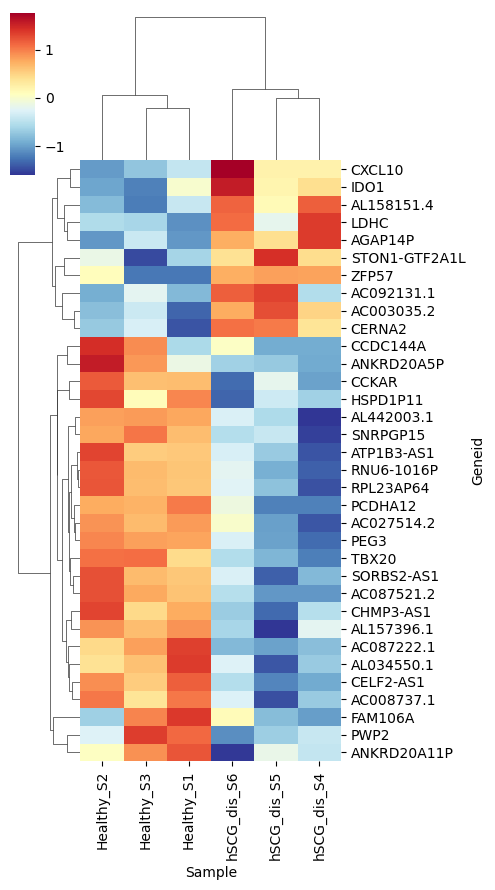

In [56]:
ax = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(5,9))

In [57]:
#volcano
from sanbomics.plots import volcano

In [58]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228929,54.452901,1.928265,0.516506,3.733285,0.000189,0.025680,RPS13P2
ENSG00000143631,31.094747,-2.988991,0.684699,-4.365411,0.000013,0.005292,FLG
ENSG00000225920,21.115490,-2.214805,0.654218,-3.385424,0.000711,0.046710,RIMKLBP2
ENSG00000284735,42.570128,-2.223007,0.636691,-3.491500,0.000480,0.040565,AL139424.3
ENSG00000259865,226.584366,1.497819,0.403741,3.709848,0.000207,0.026095,AL390728.6
...,...,...,...,...,...,...,...
ENSG00000223431,17.614259,-2.496921,0.738388,-3.381584,0.000721,0.046966,MTND6P21
ENSG00000227999,58.690483,-1.722138,0.461383,-3.732557,0.000190,0.025680,MTND5P1
ENSG00000215559,21.158449,-3.270399,0.933939,-3.501725,0.000462,0.039984,ANKRD20A11P


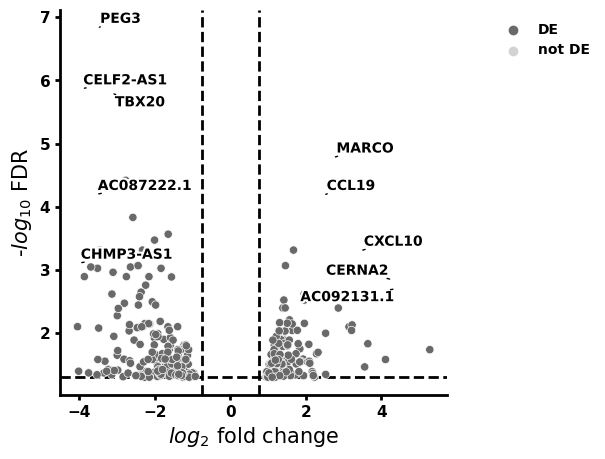

In [59]:
volcano(sigs, symbol='Symbol')

In [60]:
grapher.index

Index(['STON1-GTF2A1L', 'CHMP3-AS1', 'ATP1B3-AS1', 'CCKAR', 'CXCL10',
       'SORBS2-AS1', 'PCDHA12', 'HSPD1P11', 'RNU6-1016P', 'ZFP57', 'TBX20',
       'AC003035.2', 'IDO1', 'AL158151.4', 'RPL23AP64', 'AC087521.2', 'LDHC',
       'AL442003.1', 'AL157396.1', 'AGAP14P', 'CELF2-AS1', 'CERNA2',
       'AC092131.1', 'FAM106A', 'AC087222.1', 'CCDC144A', 'AC027514.2',
       'ANKRD20A5P', 'AL034550.1', 'SNRPGP15', 'AC008737.1', 'PEG3', 'PWP2',
       'ANKRD20A11P'],
      dtype='object', name='Geneid')

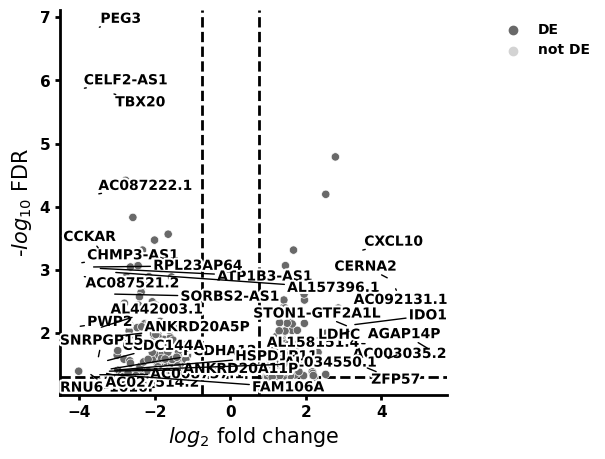

In [61]:
volcano(sigs, symbol='Symbol', to_label = grapher.index)

In [62]:
!mv /home/josh/Downloads/gene_result.txt .
!python /home/josh/anaconda3/bin/ncbi_gene_results_to_python.py -o homo_sapiens_protein.py gene_result.txt

mv: cannot stat '/home/josh/Downloads/gene_result.txt': No such file or directory
      20,670 lines READ:  gene_result.txt
      20,651 geneids WROTE: homo_sapiens_protein.py


In [63]:
ls

 bams/
 count_heart_hSCG.csv
 count.out
 count.out.summary
 data.ipynb
 de_h.csv
 fastq/
'*.fastqAligned.sortedByCoord.out.bam'
 gene2go
 gene_result.txt
 go-basic.obo
 heart_deseq_analysis.ipynb
 Homo_sapiens.GRCh38.110.gtf
 Homo_sapiens.GRCh38.dna_sm.primary_assembly.fa
 homo_sapiens_protein.py
 mapped/
 output.csv
 __pycache__/
 pydeseq2_analysis.ipynb
 ref/
 Untitled.ipynb


In [64]:
from homo_sapiens_protein import GENEID2NT as GeneID2nt_homo

In [65]:
from goatools.base import download_go_basic_obo
from goatools.base import download_ncbi_associations
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

In [183]:
#run one time to initialize
obo_fname = download_go_basic_obo()
fin_gene2go = download_ncbi_associations()
obodag = GODag("go-basic.obo")

  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2023-07-27) 46,356 Terms


In [184]:
#run one time to initialize
mapper = {}

for key in GeneID2nt_homo:
    mapper[GeneID2nt_homo[key].Symbol] = GeneID2nt_homo[key].GeneID
    
inv_map = {v: k for k, v in mapper.items()}

In [185]:
mapper

{'A1BG': 1,
 'A2M': 2,
 'NAT1': 9,
 'NAT2': 10,
 'SERPINA3': 12,
 'AADAC': 13,
 'AAMP': 14,
 'AANAT': 15,
 'AARS1': 16,
 'ABAT': 18,
 'ABCA1': 19,
 'ABCA2': 20,
 'ABCA3': 21,
 'ABCB7': 22,
 'ABCF1': 23,
 'ABCA4': 24,
 'ABL1': 25,
 'AOC1': 26,
 'ABL2': 27,
 'ABO': 28,
 'ABR': 29,
 'ACAA1': 30,
 'ACACA': 31,
 'ACACB': 32,
 'ACADL': 33,
 'ACADM': 34,
 'ACADS': 35,
 'ACADSB': 36,
 'ACADVL': 37,
 'ACAT1': 38,
 'ACAT2': 39,
 'ASIC2': 40,
 'ASIC1': 41,
 'ACHE': 43,
 'ACLY': 47,
 'ACO1': 48,
 'ACR': 49,
 'ACO2': 50,
 'ACOX1': 51,
 'ACP1': 52,
 'ACP2': 53,
 'ACP5': 54,
 'ACP3': 55,
 'ACRV1': 56,
 'ACTA1': 58,
 'ACTA2': 59,
 'ACTB': 60,
 'ACTC1': 70,
 'ACTG1': 71,
 'ACTG2': 72,
 'ACTN4': 81,
 'ACTL6A': 86,
 'ACTN1': 87,
 'ACTN2': 88,
 'ACTN3': 89,
 'ACVR1': 90,
 'ACVR1B': 91,
 'ACVR2A': 92,
 'ACVR2B': 93,
 'ACVRL1': 94,
 'ACY1': 95,
 'ACYP1': 97,
 'ACYP2': 98,
 'ADA': 100,
 'ADAM8': 101,
 'ADAM10': 102,
 'ADAR': 103,
 'ADARB1': 104,
 'ADARB2': 105,
 'ADCY1': 107,
 'ADCY2': 108,
 'ADCY3': 109,
 '

In [186]:
objanno = Gene2GoReader(fin_gene2go, taxids=[9606])
# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

HMS:0:00:02.807069 343,513 annotations, 20,757 genes, 18,851 GOs, 1 taxids READ: gene2go 


In [187]:
goeaobj = GOEnrichmentStudyNS(
        GeneID2nt_homo.keys(), # List of human protein-coding genes
        ns2assoc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 82% 16,989 of 20,651 population items found in association

Load CC Ontology Enrichment Analysis ...
 88% 18,125 of 20,651 population items found in association

Load MF Ontology Enrichment Analysis ...
 85% 17,580 of 20,651 population items found in association


In [188]:
GO_items = []

temp = goeaobj.ns2objgoea['BP'].assoc
for item in temp:
    GO_items += temp[item]
    

temp = goeaobj.ns2objgoea['CC'].assoc
for item in temp:
    GO_items += temp[item]
    

temp = goeaobj.ns2objgoea['MF'].assoc
for item in temp:
    GO_items += temp[item]

In [189]:
#pass list of gene symbols
def go_it(test_genes):
    print(f'input genes: {len(test_genes)}')
    
    mapped_genes = []
    for gene in test_genes:
        try:
            mapped_genes.append(mapper[gene])
        except:
            pass
    print(f'mapped genes: {len(mapped_genes)}')
    
    goea_results_all = goeaobj.run_study(mapped_genes)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
    GO = pd.DataFrame(list(map(lambda x: [x.GO, x.goterm.name, x.goterm.namespace, x.p_uncorrected, x.p_fdr_bh,\
                   x.ratio_in_study[0], x.ratio_in_study[1], GO_items.count(x.GO), list(map(lambda y: inv_map[y], x.study_items)),\
                   ], goea_results_sig)), columns = ['GO', 'term', 'class', 'p', 'p_corr', 'n_genes',\
                                                    'n_study', 'n_go', 'study_genes'])

    GO = GO[GO.n_genes > 1]
    return GO

In [190]:

df = go_it(res['Symbol'])

input genes: 21300
mapped genes: 15325

Runing BP Ontology Analysis: current study set of 15325 IDs.
 90% 13,855 of 15,323 study items found in association
100% 15,323 of 15,325 study items found in population(20651)
Calculating 12,298 uncorrected p-values using fisher_scipy_stats
  12,298 terms are associated with 16,989 of 20,651 population items
  11,815 terms are associated with 13,855 of 15,323 study items
  METHOD fdr_bh:
     442 GO terms found significant (< 0.05=alpha) (398 enriched +  44 purified): statsmodels fdr_bh
  10,816 study items associated with significant GO IDs (enriched)
   1,139 study items associated with significant GO IDs (purified)

Runing CC Ontology Analysis: current study set of 15325 IDs.
 95% 14,579 of 15,323 study items found in association
100% 15,323 of 15,325 study items found in population(20651)
Calculating 1,793 uncorrected p-values using fisher_scipy_stats
   1,793 terms are associated with 18,125 of 20,651 population items
   1,759 terms are ass

In [191]:
df

,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
0,GO:0015031,protein transport,biological_process,2.829930e-28,8.700621e-25,332,15323,345,"[CCDC91, RABEP2, SEH1L, KIF18A, RAB9B, EPS15, ..."
1,GO:0051301,cell division,biological_process,4.546910e-28,1.118358e-24,336,15323,350,"[CABLES2, SEH1L, SDE2, MCMBP, MIS18BP1, CENPW,..."
2,GO:0006468,protein phosphorylation,biological_process,2.599635e-27,5.328386e-24,358,15323,377,"[EPHB2, EPHB3, EPHB6, TSSK6, ERBB2, MAK, ABL1,..."
3,GO:0006974,DNA damage response,biological_process,1.342587e-25,2.063892e-22,264,15323,273,"[MYC, CDKN1A, ACER2, SMG1, SETD1A, NCOA6, METT..."
4,GO:0006281,DNA repair,biological_process,2.272098e-25,3.104696e-22,235,15323,244,"[CDK9, PDS5B, SMG1, EPC2, CHAF1B, PTTG1, ERCC1..."
...,...,...,...,...,...,...,...,...,...
844,GO:0005436,sodium:phosphate symporter activity,molecular_function,5.038330e-04,1.741823e-02,3,15323,12,"[SLC17A7, SLC20A1, SLC20A2]"
845,GO:0003796,lysozyme activity,molecular_function,5.235955e-04,1.796636e-02,2,15323,10,"[LYG1, LYZ]"
846,GO:1990837,sequence-specific double-stranded DNA binding,molecular_function,6.818808e-04,2.177288e-02,377,15323,556,"[MAFG, DPF1, NR2F6, ZNF444, ABL1, ERG, ESR1, E..."
847,GO:0008392,arachidonic acid epoxygenase activity,molecular_function,1.035257e-03,3.071039e-02,5,15323,15,"[CYP2E1, CYP2J2, CYP4F12, CYP2C8, CYP2S1]"


In [192]:
df['per'] = df.n_genes/df.n_go

In [198]:

df = df[0:15]

In [199]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap

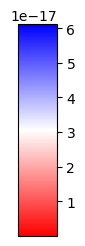

In [200]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

cmap = mpl.cm.bwr_r
norm = mpl.colors.Normalize(vmin = df.p_corr.min(), vmax = df.p_corr.max())

mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')

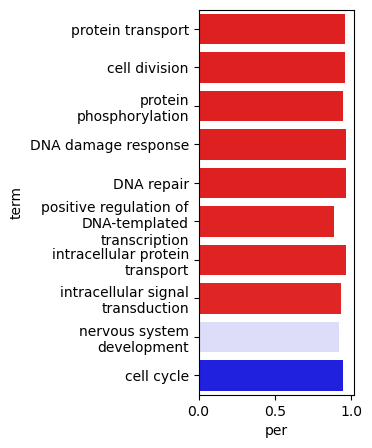

In [201]:
plt.figure(figsize = (2,5))



ax = sns.barplot(data = df, x = 'per', y = 'term', palette = mapper.to_rgba(df.p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 22) for e in df['term']])

plt.show()